# United Datasets, oversampling on color


In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

Importing datasets manually

In [221]:
df_red = pd.read_csv('../winequality-red.csv', sep=';')

df_white = pd.read_csv('../winequality-white.csv', sep=';')

I add a color column to the datasets

In [222]:
df_red['color'] = 0    # per red
df_white['color'] = 1  # per white

df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


i'm applying oversampling to the red dataset so it does not have a lot less values than white

In [223]:

X_red = df_red.drop(columns='quality')
y_red = df_red['quality']

smote = SMOTE(random_state=42)
X_red_resampled, y_red_resampled = smote.fit_resample(X_red, y_red)

I concatenate the red and white datasets to have a single one

In [224]:
red_wine_resampled = pd.concat([
    pd.DataFrame(X_red_resampled, columns=X_red.columns),
    pd.Series(y_red_resampled, name='quality')
], axis=1)

data = pd.concat([red_wine_resampled, df_white], ignore_index=True)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,6
8980,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,5
8981,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,6
8982,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,7


## Expolaratory Data analysis

We start with a pie chart to look at the proportion of quality levels

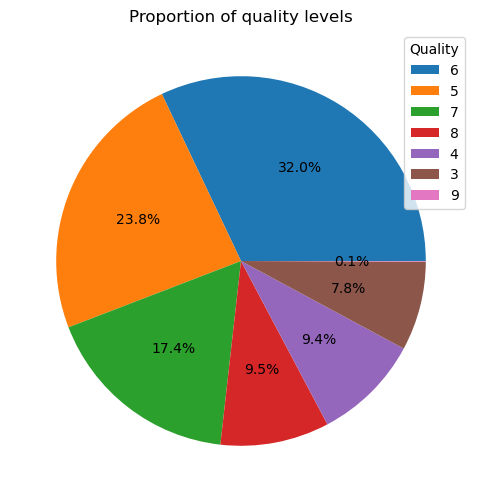

In [225]:
y = data['quality']
count = y.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of quality levels')
plt.legend(labels=count.index, title="Quality", loc="best")
plt.show()

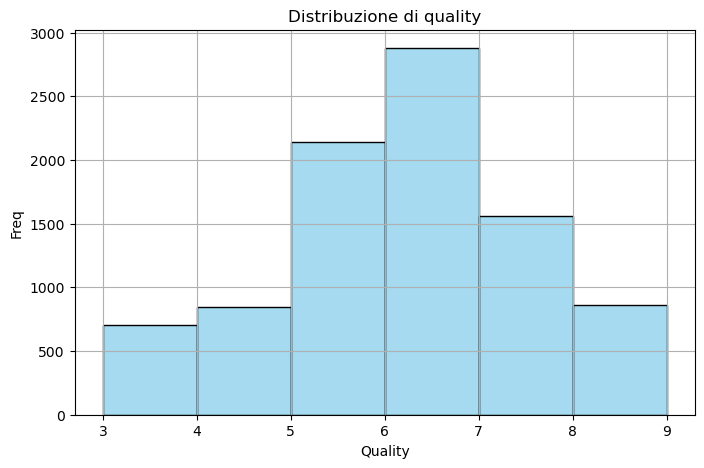

In [226]:
plt.figure(figsize=(8, 5))
sns.histplot(df['quality'], bins=range(data['quality'].min(), data['quality'].max()+1), color='skyblue')
plt.title("Distribuzione di quality")
plt.xlabel("Quality")
plt.ylabel("Freq")
plt.grid(True)
plt.show()


Then we plot another piechart to make sure that now the classes are balanced.

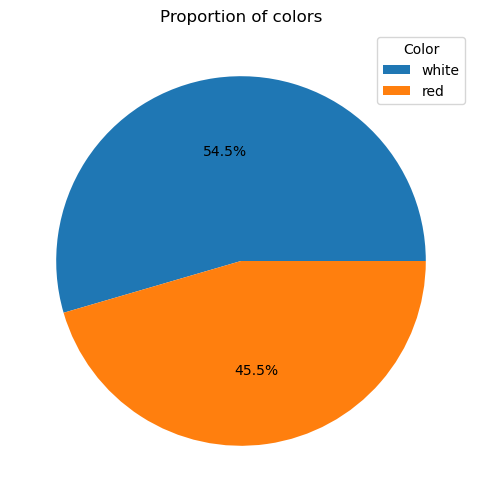

In [227]:
y = data['color'].map({0: 'red', 1: 'white'})
count = y.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of colors')
plt.legend(labels=count.index, title="Color", loc="best")
plt.show()

I am now making a pairplot to visualize the correlation among variables.

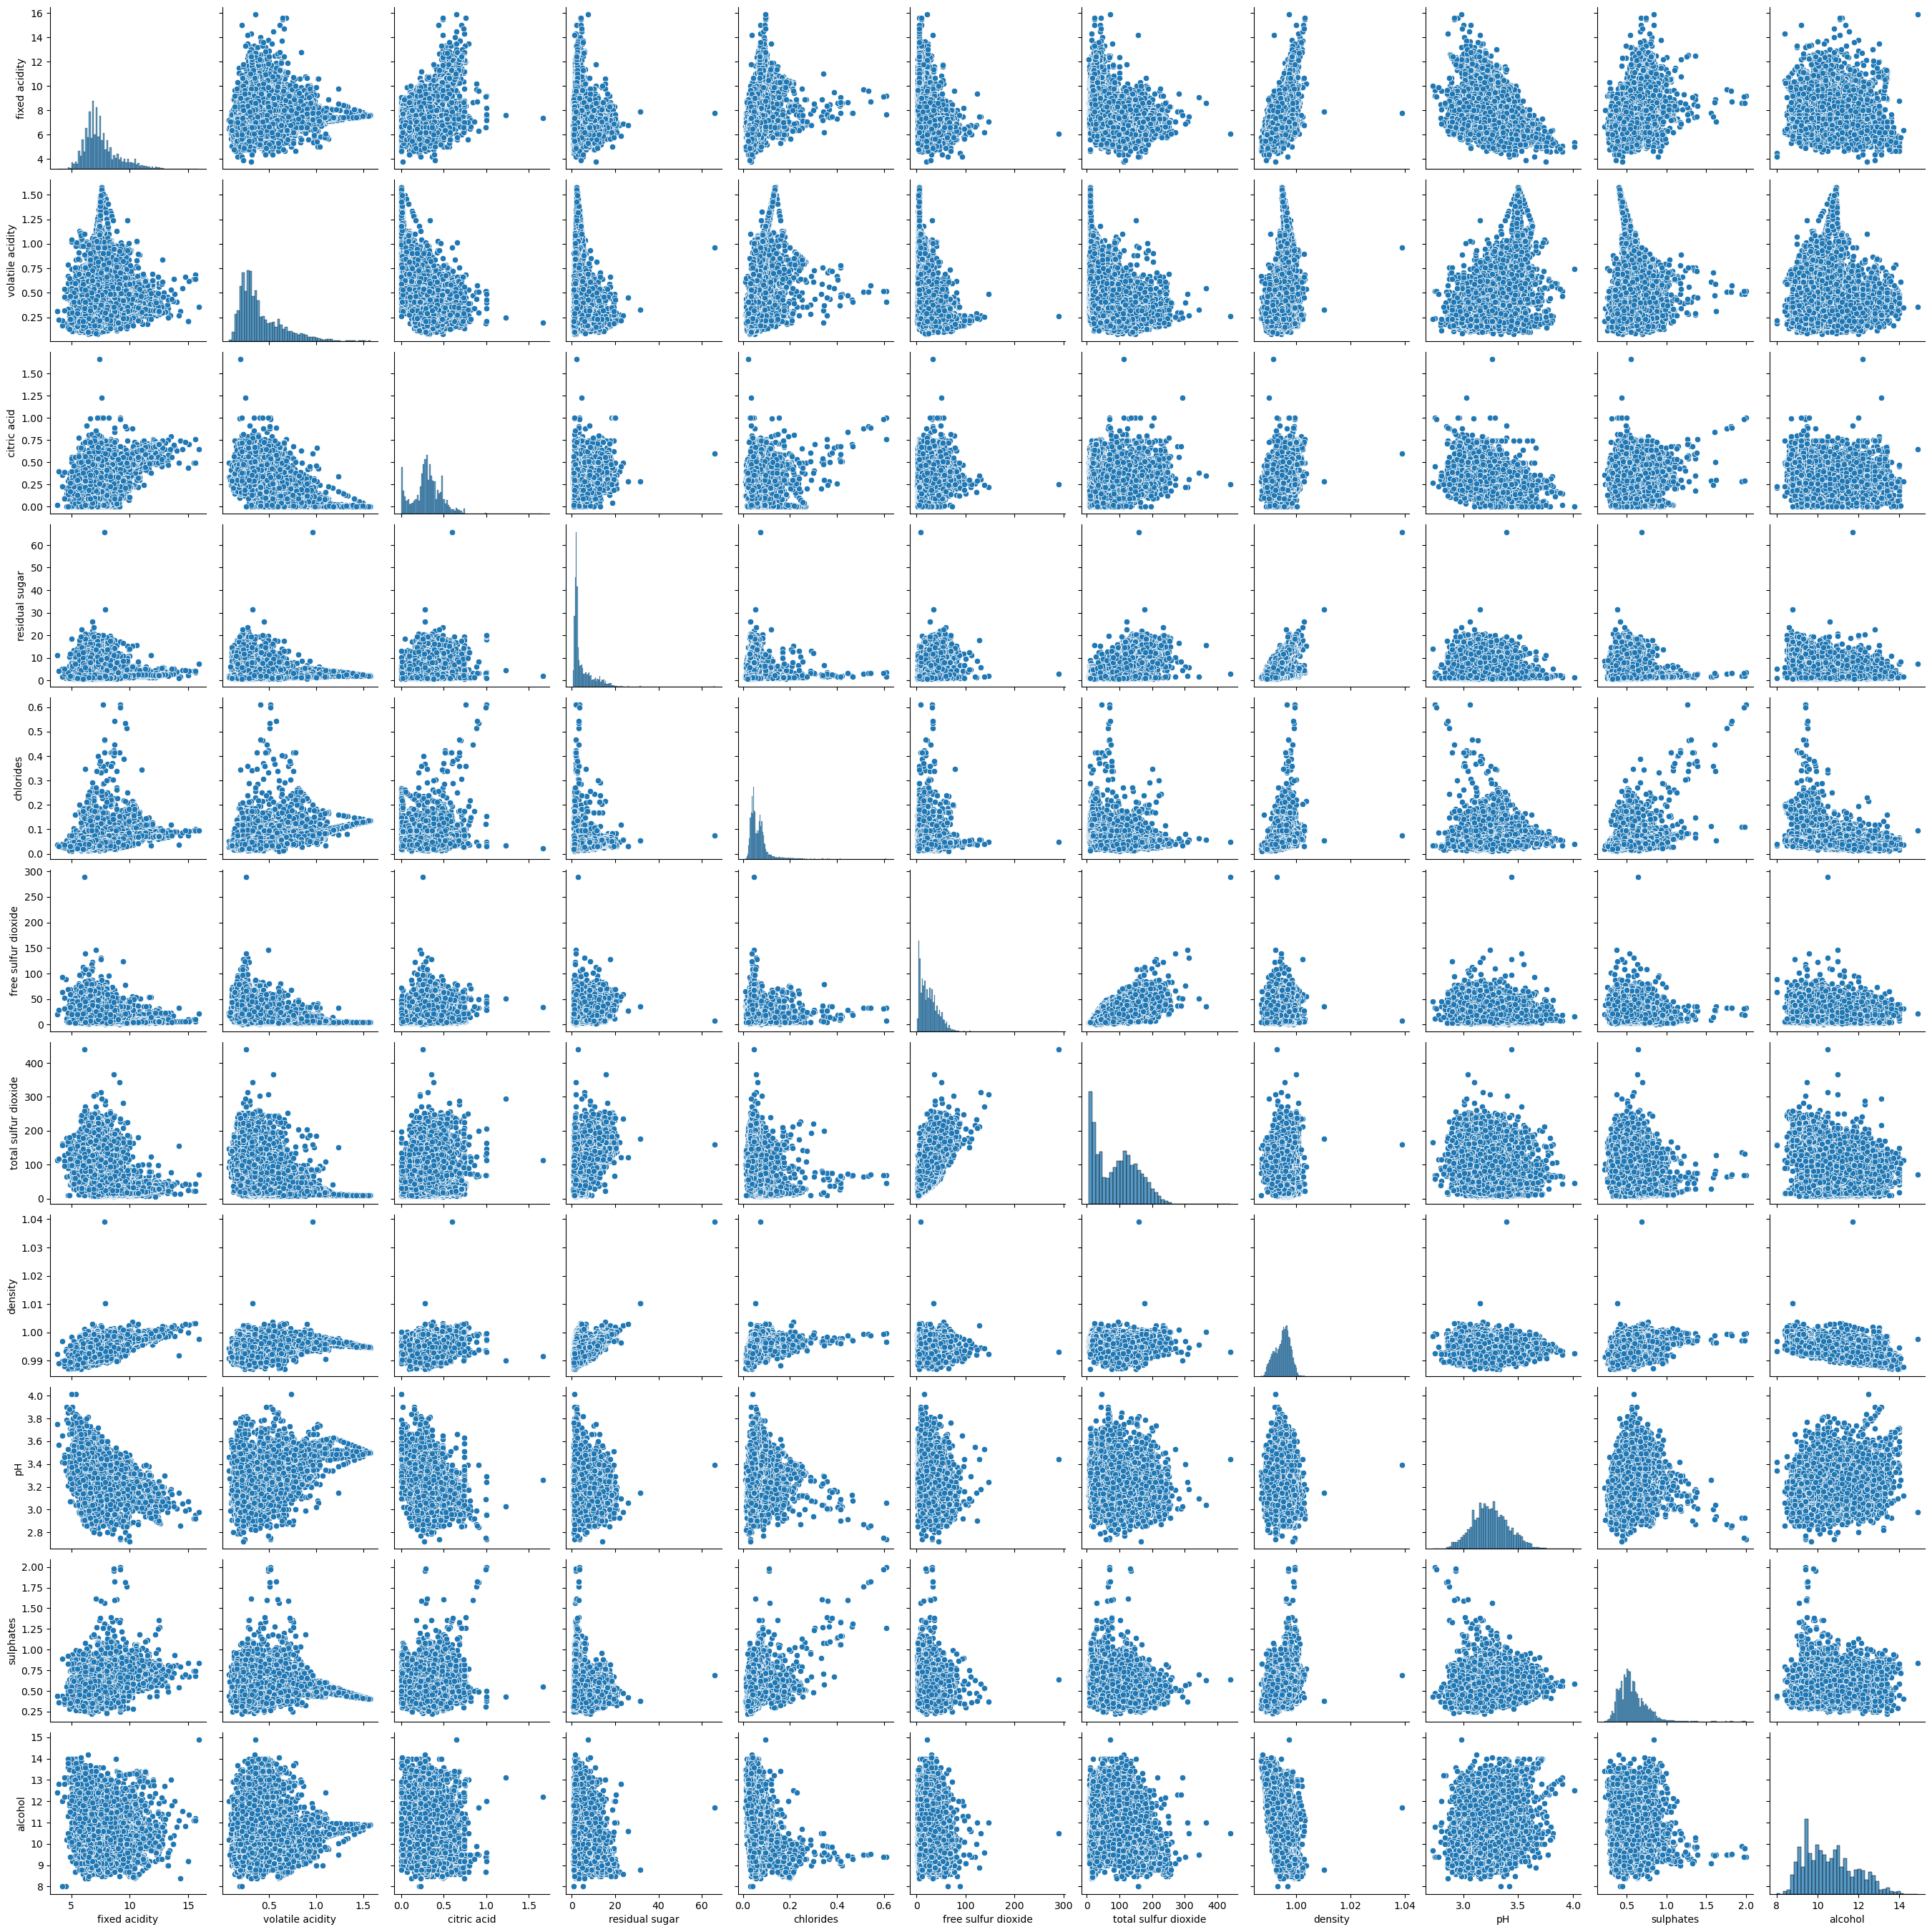

In [228]:
sns.pairplot(data.drop(columns=['quality', 'color']))

Then we are plotting a correlation matrix to put a numerical value tu to one to one correlation among pairs of variables

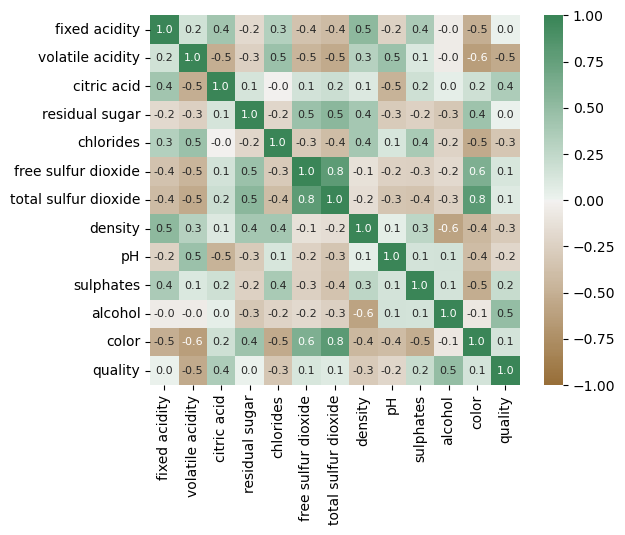

In [229]:

correlation = data.corr()

axis_corr = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True,
annot=True,
fmt=".1f",
annot_kws={"size": 8}
)

plt.show()

In [230]:
df = data.copy()

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,6
8980,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,5
8981,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,6
8982,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,7


i created a new feature from 2 strongly correlated features

In [231]:
df['bound_sulfur_dioxide'] = df['total sulfur dioxide'] - df['free sulfur dioxide']

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality,bound_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,6,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,6,68.0
8980,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,5,111.0
8981,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,6,81.0
8982,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,7,90.0


In [232]:
df = df.drop(columns = ['total sulfur dioxide', 'free sulfur dioxide'])

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,color,quality,bound_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,0,5,23.0
1,7.8,0.88,0.00,2.6,0.098,0.99680,3.20,0.68,9.8,0,5,42.0
2,7.8,0.76,0.04,2.3,0.092,0.99700,3.26,0.65,9.8,0,5,39.0
3,11.2,0.28,0.56,1.9,0.075,0.99800,3.16,0.58,9.8,0,6,43.0
4,7.4,0.70,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,0,5,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,0.99114,3.27,0.50,11.2,1,6,68.0
8980,6.6,0.32,0.36,8.0,0.047,0.99490,3.15,0.46,9.6,1,5,111.0
8981,6.5,0.24,0.19,1.2,0.041,0.99254,2.99,0.46,9.4,1,6,81.0
8982,5.5,0.29,0.30,1.1,0.022,0.98869,3.34,0.38,12.8,1,7,90.0


We now take a look at the correlation among the features and target 

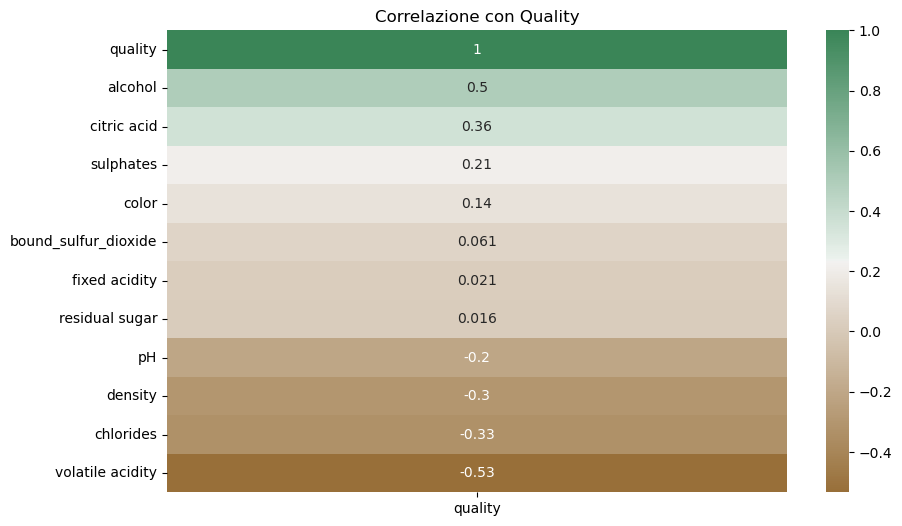

In [233]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr[['quality']].sort_values(by='quality', ascending=False), annot=True, cmap=sns.diverging_palette(50, 500, n=500))
plt.title('Correlazione con Quality')
plt.show()

bound dioxide, fixed acidity e residual sugar si possono gettare

In [234]:
df = df.drop(columns=['residual sugar', 'fixed acidity'])


dovrei anche fare il test di multicollinearità

Prima di fare PCA scalo i valori continui

In [235]:
X = df.drop(columns='quality')
exclude = ['color']

to_scale = [col for col in X.columns if col not in exclude]

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[to_scale] = scaler.fit_transform(X[to_scale])

X


,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,color,bound_sulfur_dioxide
0,0.70,0.00,0.076,0.99780,3.51,0.56,9.4,0,23.0
1,0.88,0.00,0.098,0.99680,3.20,0.68,9.8,0,42.0
2,0.76,0.04,0.092,0.99700,3.26,0.65,9.8,0,39.0
3,0.28,0.56,0.075,0.99800,3.16,0.58,9.8,0,43.0
4,0.70,0.00,0.076,0.99780,3.51,0.56,9.4,0,23.0
...,...,...,...,...,...,...,...,...,...
8979,0.21,0.29,0.039,0.99114,3.27,0.50,11.2,1,68.0
8980,0.32,0.36,0.047,0.99490,3.15,0.46,9.6,1,111.0
8981,0.24,0.19,0.041,0.99254,2.99,0.46,9.4,1,81.0
8982,0.29,0.30,0.022,0.98869,3.34,0.38,12.8,1,90.0


Let's proceed with the Principal Components Analysis

In [236]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

y = data['quality'].values

We visualize the biplot

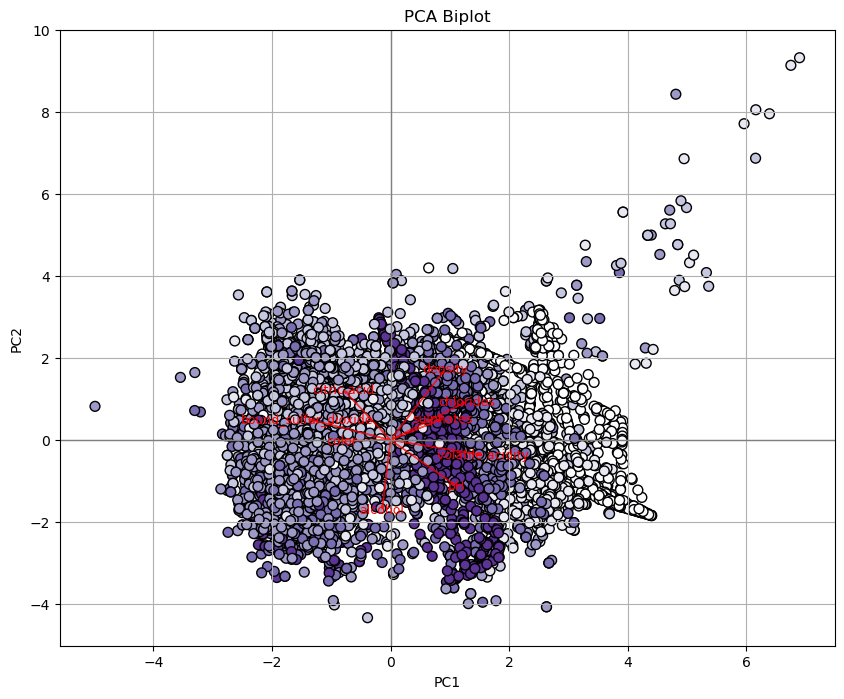

In [237]:
# so che non si vede, ma questa è comunque la cmap con cui si vede di piu
loadings = pca.components_.T 
feature_names = X_scaled.columns

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Purples', edgecolor='k', s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot")


for i, feature in enumerate(feature_names):
    plt.arrow(0, 0,
              loadings[i, 0] * 3,
              loadings[i, 1] * 3,
              color='r', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2,
             feature, color='r', ha='center', va='center', fontsize=9)

plt.grid(True)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.show()


scree plot

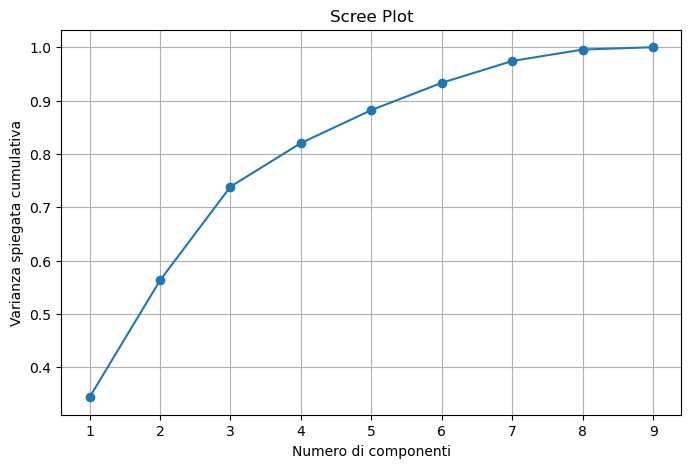

In [238]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Numero di componenti')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

percentual variance explained

In [239]:
pve = pca_full.explained_variance_ratio_
for i, v in enumerate(pve):
    print(f"PC{i+1}: {v:.4f}")

print(pca_full.explained_variance_ratio_[0:2].sum())


PC1: 0.3437
PC2: 0.2191
PC3: 0.1758
PC4: 0.0817
PC5: 0.0619
PC6: 0.0511
PC7: 0.0410
PC8: 0.0214
PC9: 0.0043
0.5627958565492499


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle= True)

X_train

,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,color,bound_sulfur_dioxide
87,0.490000,0.260000,0.062000,0.996600,3.390000,0.640000,9.600000,0,22.000000
3393,0.291538,0.371538,0.076154,0.994994,3.343231,0.773692,12.056923,0,27.846152
2884,0.374654,0.302926,0.059122,0.995935,3.286866,0.563940,11.197929,0,101.352590
401,0.260000,0.300000,0.059000,0.994900,3.290000,0.470000,10.800000,0,18.000000
2465,0.516777,0.988028,0.597637,0.999545,2.753353,1.970071,9.404605,0,37.575565
...,...,...,...,...,...,...,...,...,...
5734,0.300000,0.490000,0.045000,0.994200,3.400000,0.590000,10.200000,1,69.000000
5191,0.320000,0.450000,0.028000,0.992200,3.510000,0.490000,11.500000,1,166.000000
5390,0.590000,0.710000,0.038000,1.000000,2.950000,0.750000,9.300000,1,167.000000
860,0.620000,0.060000,0.077000,0.997460,3.510000,0.540000,9.500000,0,70.000000


# EXPERIMENTS
We start by looking at the best performing models w/o optmization.
First we load the models

In [241]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier()
}

We then scale the sets

In [242]:
cols_to_scale = X.columns.difference(['color'])

scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

And now we train all the models to select the best permorming ones.

In [243]:
best_model = None
best_accuracy = 0
results = {}
best_models ={}

for name, model in models.items():
    if name == 'Decision Tree':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

    if acc >= 0.6:
        best_models[name] = model


    if acc > best_accuracy:
        best_accuracy = acc
        best_model = name

print(f"best model: {best_model} with accuracy {best_accuracy:.4f}")

SVM Accuracy: 0.6055
Logistic Regression Accuracy: 0.5476
MLP Accuracy: 0.6405
Decision Tree Accuracy: 0.6912
best model: Decision Tree with accuracy 0.6912


In [244]:
best_models

{'SVM': SVC(),
 'MLP': MLPClassifier(max_iter=1000),
 'Decision Tree': DecisionTreeClassifier()}

Since we only found accuracy >= 0.6 for mlp and decision trees we are going to grid search only on those

## Grid Search for SVM

In [245]:
param_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


In [246]:
svc = SVC()
search_svc = GridSearchCV(svc, param_svc, cv=5, scoring='accuracy', n_jobs=-1)
search_svc.fit(X_train_scaled, y_train)

print("Best param SVC:", search_svc.best_params_)
print("Accuracy SVC validation:", search_svc.best_score_)

y_pred_svc = search_svc.best_estimator_.predict(X_test_scaled)
print("Accuracy SVC test:", accuracy_score(y_test, y_pred_svc))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best param SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy SVC validation: 0.6440805921004875
Accuracy SVC test: 0.6360601001669449


## Grid Search for Neural Network

In [247]:
param_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001]
}

In [248]:
mlp = MLPClassifier(max_iter=1000, random_state=42)
search_mlp = GridSearchCV(mlp, param_mlp, cv=5, scoring='accuracy', n_jobs=-1)
search_mlp.fit(X_train_scaled, y_train)

print("Best param MLP:", search_mlp.best_params_)
print("Best accuracy validation:", search_mlp.best_score_)

y_pred_mlp = search_mlp.best_estimator_.predict(X_test_scaled)
print("Accuracy MLP test:", accuracy_score(y_test, y_pred_mlp))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best param MLP: {'alpha': 0.001, 'hidden_layer_sizes': (100, 50)}
Best accuracy validation: 0.6579908304563575
Accuracy MLP test: 0.669449081803005


## Grid Search Decision tree

In [249]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

print("Best param tree:", grid_search_tree.best_params_)
print("Best accuracy validation:", grid_search_tree.best_score_)

y_pred_tree = grid_search_tree.best_estimator_.predict(X_test)
print("Accuracy tree test:", accuracy_score(y_test, y_pred_tree))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best param tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy validation: 0.6531234423438569
Accuracy tree test: 0.679465776293823
